### Cirrhosis Dataset

In [2143]:
# For EDA and Preprocessing
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

Load Datasets

In [2144]:
cirrhosis_data = pd.read_csv('./cirrhosis.csv')

In [2145]:
cirrhosis_data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## Exploratory Data Analysis

In [2146]:
#check datasets shape
cirrhosis_data.shape

(418, 20)

In [2147]:
# Check dataset columns
cirrhosis_data.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [2148]:
#Check dataset features types
cirrhosis_data.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [2149]:
# Drop duplicate data
cirrhosis_data = cirrhosis_data.drop_duplicates()
cirrhosis_data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [2150]:
# Transfrom Age from days to years
cirrhosis_data['Age'] = (cirrhosis_data['Age']/365).round()
cirrhosis_data['Age']

0      59.0
1      56.0
2      70.0
3      55.0
4      38.0
       ... 
413    67.0
414    39.0
415    57.0
416    58.0
417    53.0
Name: Age, Length: 418, dtype: float64

In [2151]:
cirrhosis_data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,50.772727,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,10.442880,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,26.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,43.000000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,51.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,58.000000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,78.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [2152]:
# Checking numerical and categorical features
numerical_cols = []
categorical_cols = []

for column in cirrhosis_data.columns:
    if pd.api.types.is_numeric_dtype(cirrhosis_data[column]):
        numerical_cols.append(column)
    else:
        categorical_cols.append(column)

print(f'Numerical Features: {len(numerical_cols)} ,{numerical_cols}')     
print(f'Categorical Features: {len(categorical_cols)} ,{categorical_cols}')  

Numerical Features: 13 ,['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
Categorical Features: 7 ,['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


In [2153]:
cirrhosis_data.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

Univariate Analysis

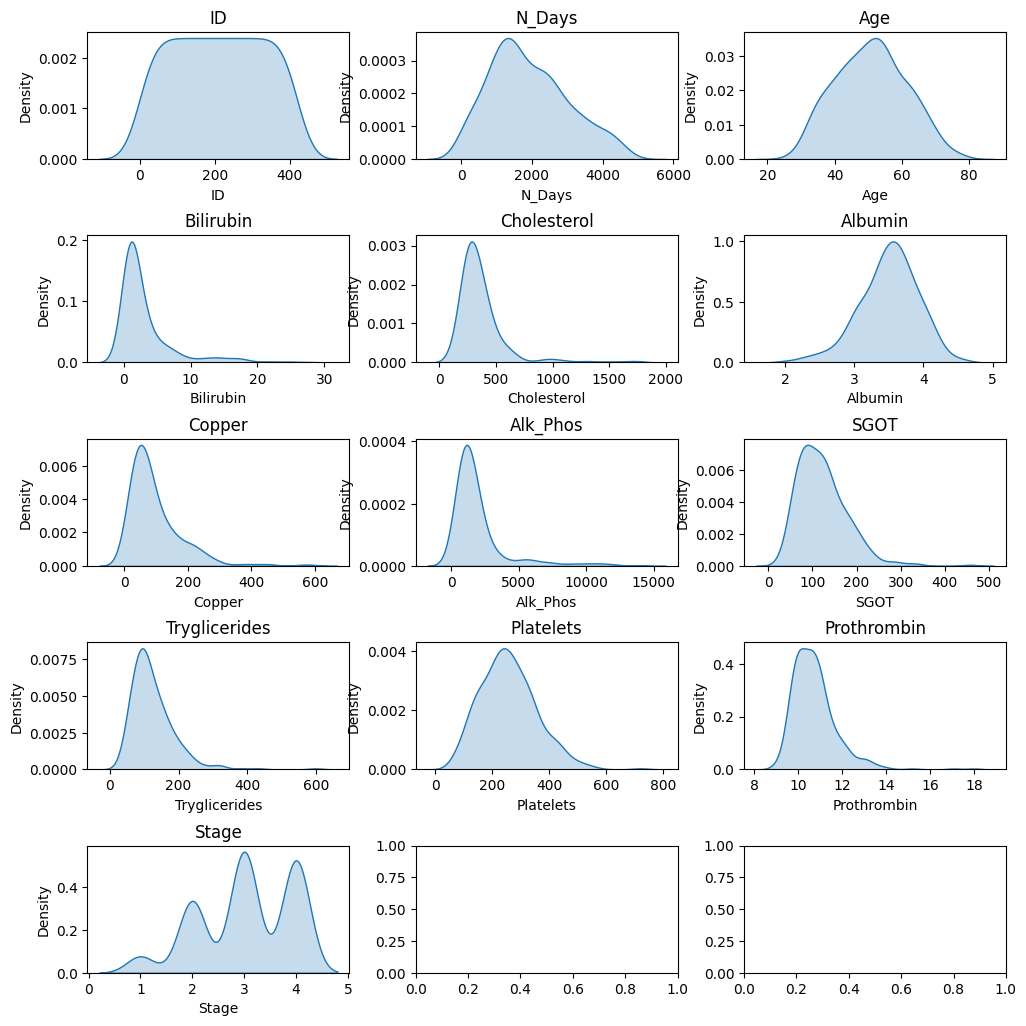

In [2154]:
# Check the skrew of data
# Create subplots for kde plots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))
fig.tight_layout()

# Iterate through the list and create kde plots
for i, k in enumerate(numerical_cols):
    row, col = divmod(i, 3)
    sns.kdeplot(data = cirrhosis_data,x=k, fill=True, ax=axes[row, col])
    axes[row, col].set_title(k)
plt.subplots_adjust(hspace=0.6)
plt.show()

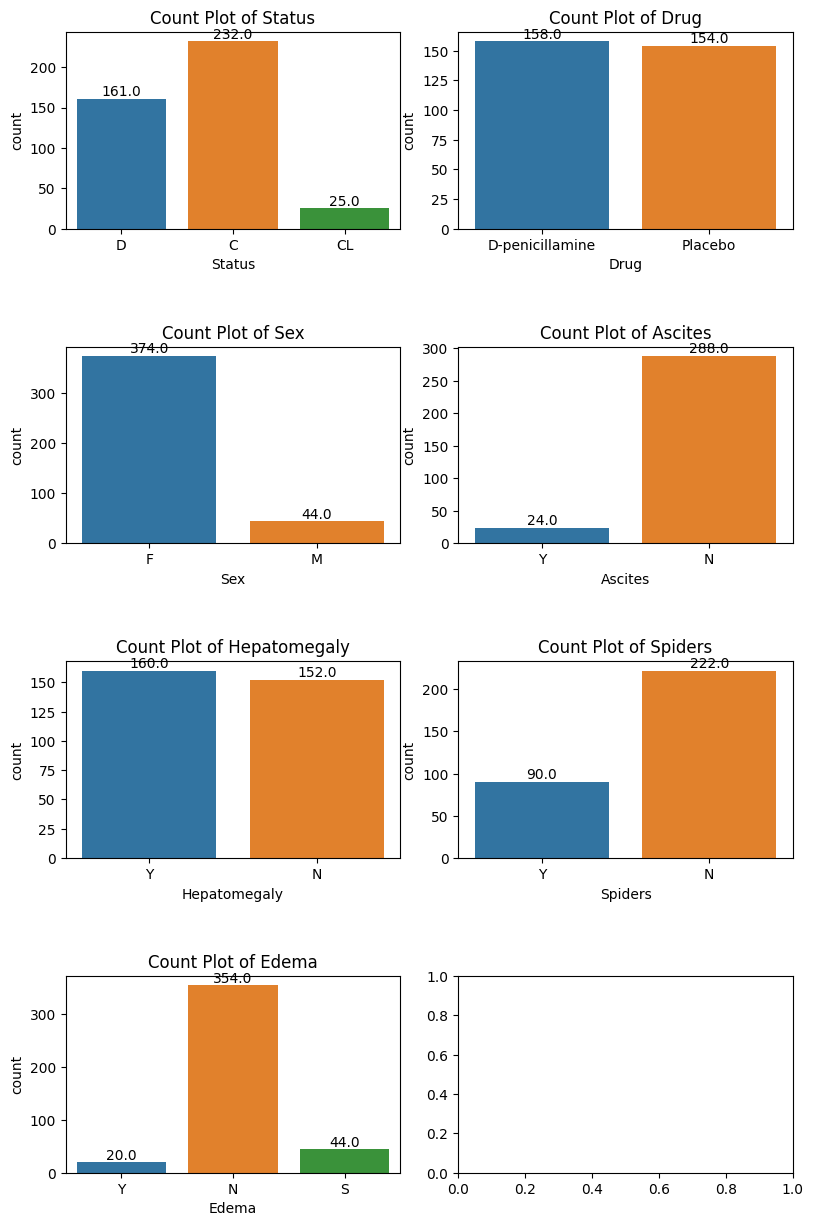

In [2155]:
# Countplot for categorical features
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 12))
fig.tight_layout()

# Iterate through the list of categorical features and create count plots
for i, feature in enumerate(categorical_cols):
    row, col = divmod(i, 2)
    ax = sns.countplot(data=cirrhosis_data, x=feature, ax=axes[row, col])
     # Add count annotations above each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    axes[row, col].set_title(f'Count Plot of {feature}')
plt.subplots_adjust(hspace=0.6)
plt.show()

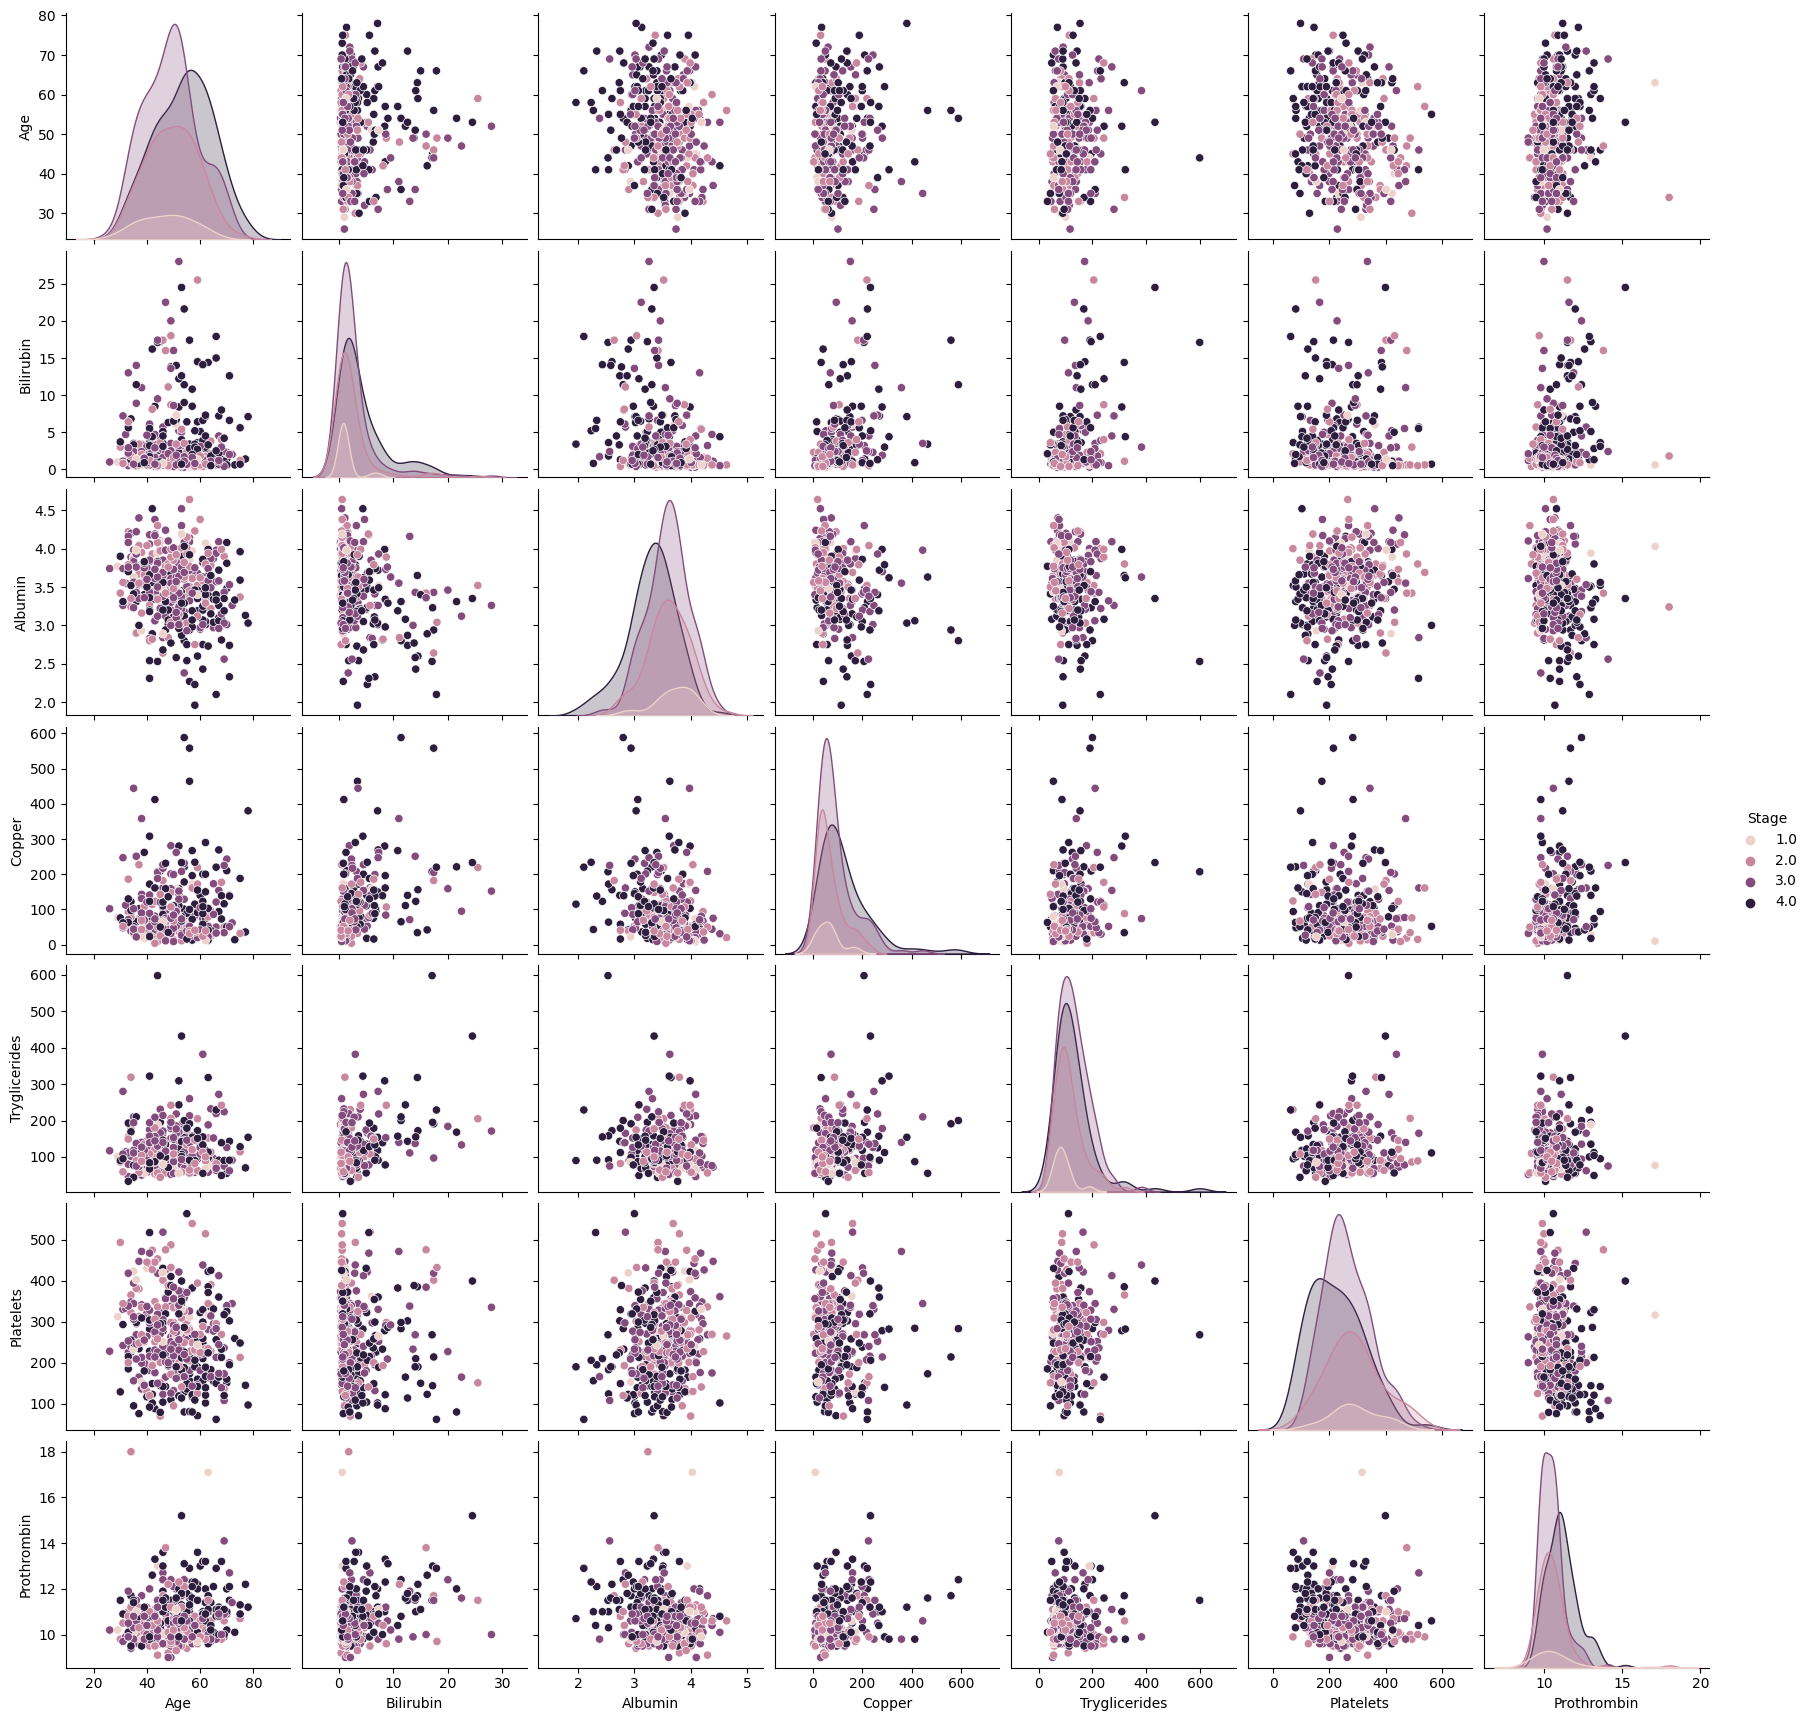

In [2156]:
numerical_columns = ['Age', 'Bilirubin', 'Albumin', 'Copper', 'Tryglicerides', 'Platelets', 'Prothrombin']

sns.pairplot(cirrhosis_data[numerical_columns + ['Stage']], hue='Stage', diag_kind='kde')
plt.show()



Most of the numerical features such as Bilirubin, Prothrombin, Triglycerides, etc. follow the Gaussian distribution so their missing values can be imputed with their corresponding median values.


<Axes: >

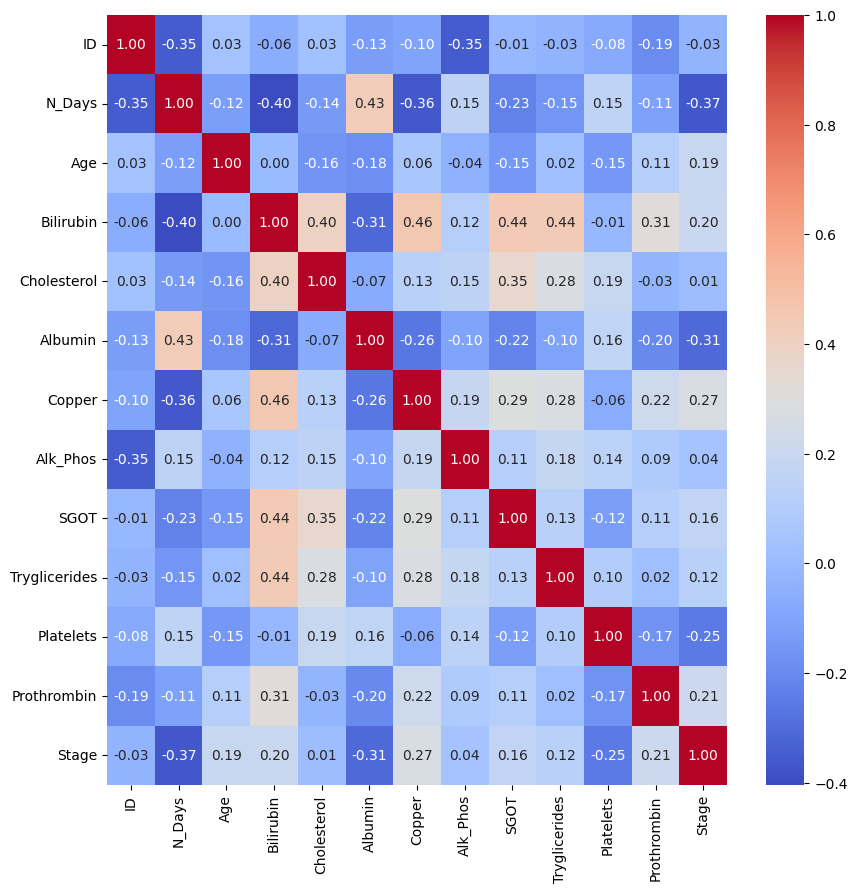

In [2157]:
# Correlation Matrix 
plt.figure(figsize=(10,10))
sns.heatmap(cirrhosis_data[numerical_cols].corr(), fmt=".2f", annot=True, cmap="coolwarm")


<Axes: xlabel='x', ylabel='y'>

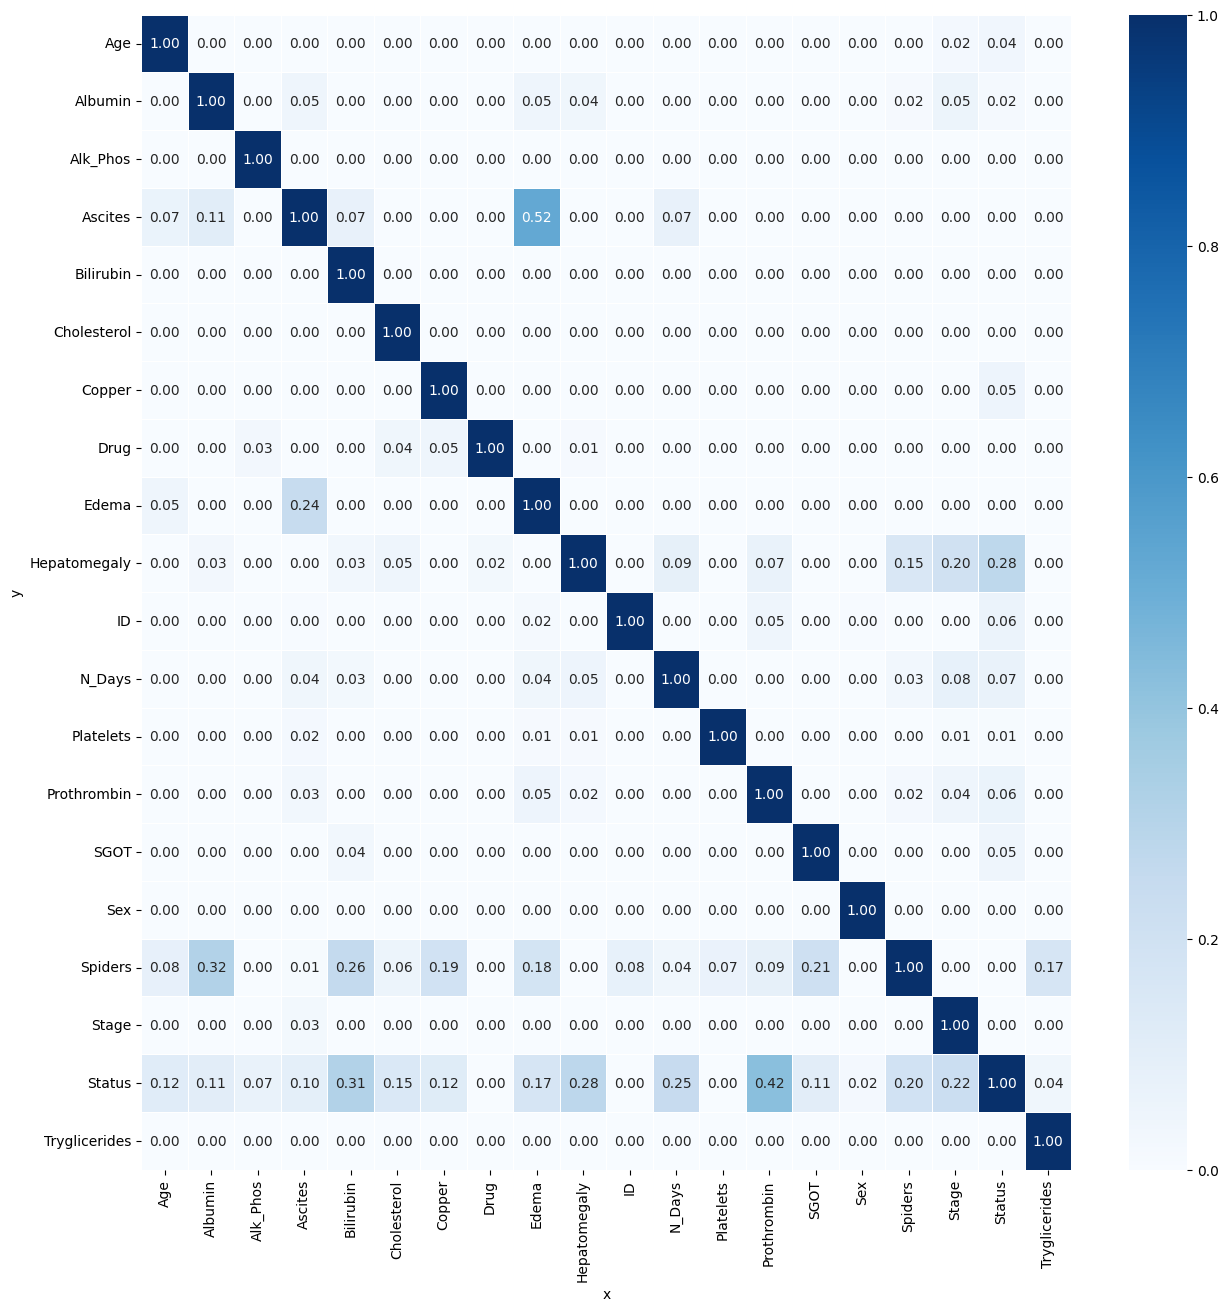

In [2158]:
# Predictive Power Score
import ppscore as pps
#Create another dataframe to used with pps (just in case that adjusting the features for this)
df_pps=cirrhosis_data.copy()
matrix_df_pps = pps.matrix(df_pps)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(15,15))
sns.heatmap(matrix_df_pps, vmin=0, vmax=1, fmt=".2f", cmap="Blues", linewidths=0.5, annot=True)

## Data PreProcessing

# Imputation

In [2159]:
cirrhosis_data.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [2160]:
# Drop rows with missing values in columns with less null values
columns_to_dropna = ['Platelets', 'Prothrombin', 'Stage']
cirrhosis_data = cirrhosis_data.dropna(subset=columns_to_dropna)

In [2161]:
# Impute missing values for numeric columns with mean
cirrhosis_data[numerical_cols] = cirrhosis_data[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Impute missing values for categorical columns with mode
cirrhosis_data[categorical_cols] = cirrhosis_data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


In [2162]:
#Drop unnecessary columns
cirrhosis_data.drop(columns=['ID'],inplace=True)

In [2163]:
cirrhosis_data.dropna()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,D,D-penicillamine,67.0,F,N,Y,N,N,1.2,310.0,2.96,73.0,1264.0,116.25,108.0,174.0,10.9,3.0
414,1103,C,D-penicillamine,39.0,F,N,Y,N,N,0.9,310.0,3.83,73.0,1264.0,116.25,108.0,180.0,11.2,4.0
415,1055,C,D-penicillamine,57.0,F,N,Y,N,N,1.6,310.0,3.42,73.0,1264.0,116.25,108.0,143.0,9.9,3.0
416,691,C,D-penicillamine,58.0,F,N,Y,N,N,0.8,310.0,3.75,73.0,1264.0,116.25,108.0,269.0,10.4,3.0


In [2164]:
cirrhosis_data.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [2165]:
cirrhosis_data['Stage'].unique()

array([4., 3., 2., 1.])

# Encoding

In [2166]:
cols_for_label_encoder = ['Status', 'Drug', 'Hepatomegaly', 'Sex', 'Spiders', 'Ascites','Edema']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cols_for_label_encoder:
    cirrhosis_data[col] = label_encoder.fit_transform(cirrhosis_data[col])

In [2167]:
cirrhosis_data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,2,0,59.0,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,0,0,56.0,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,2,0,70.0,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,2,0,55.0,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,1,1,38.0,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## PreProcessing

In [2168]:
X = cirrhosis_data.drop(columns=['N_Days', 'Stage'], axis=1)
X

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,2,0,59.0,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,0,0,56.0,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,2,0,70.0,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,2,0,55.0,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,1,1,38.0,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2,0,67.0,0,0,1,0,0,1.2,310.0,2.96,73.0,1264.0,116.25,108.0,174.0,10.9
414,0,0,39.0,0,0,1,0,0,0.9,310.0,3.83,73.0,1264.0,116.25,108.0,180.0,11.2
415,0,0,57.0,0,0,1,0,0,1.6,310.0,3.42,73.0,1264.0,116.25,108.0,143.0,9.9
416,0,0,58.0,0,0,1,0,0,0.8,310.0,3.75,73.0,1264.0,116.25,108.0,269.0,10.4


In [2169]:
cirrhosis_data['Stage'] = cirrhosis_data['Stage'].replace({1.0:0,2.0:0,3.0:0,4.0:1}).astype(int)
y = cirrhosis_data['Stage']
y

0      1
1      0
2      1
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Stage, Length: 399, dtype: int64

In [2170]:
#finding outliers for X_train datasets
def outlier_count(col, data = cirrhosis_data):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [2171]:
for col in cirrhosis_data.columns:
    outlier_count(col)



---------------Sex---------------

Number of outliers: 43
Percent of data that is outlier: 10.78%

---------------Ascites---------------

Number of outliers: 24
Percent of data that is outlier: 6.02%

---------------Spiders---------------

Number of outliers: 90
Percent of data that is outlier: 22.56%

---------------Edema---------------

Number of outliers: 63
Percent of data that is outlier: 15.79%

---------------Bilirubin---------------

Number of outliers: 44
Percent of data that is outlier: 11.03%

---------------Cholesterol---------------

Number of outliers: 41
Percent of data that is outlier: 10.28%

---------------Albumin---------------

Number of outliers: 9
Percent of data that is outlier: 2.26%

---------------Copper---------------

Number of outliers: 43
Percent of data that is outlier: 10.78%

---------------Alk_Phos---------------

Number of outliers: 42
Percent of data that is outlier: 10.53%

---------------SGOT---------------

Number of outliers: 20
Percent of data 

In [2172]:
for col in cirrhosis_data.columns:
    if cirrhosis_data[col].dtypes != 'object':
        q75, q25 = np.percentile(cirrhosis_data[col], [75, 25])
        iqr = q75 - q25
        min_val = q25 - (iqr * 1.5)
        max_val = q75 + (iqr * 1.5)
        cirrhosis_data[col] = np.where(cirrhosis_data[col]>min_val,min_val,np.where(cirrhosis_data[col]<max_val,max_val,cirrhosis_data[col]))

In [2173]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Display feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores.sort_values(by='Score', ascending=False, inplace=True)
print("Feature Scores:\n", feature_scores)

# Select the top k features (adjust k as needed)
k = 10
selected_features = feature_scores.head(k)['Feature'].tolist()
X_selected = X[selected_features]

# Display selected features
print(f"Selected Features (Top {k}):\n", selected_features)

Feature Scores:
           Feature      Score
10        Albumin  55.422313
5    Hepatomegaly  55.361119
16    Prothrombin  50.095906
0          Status  43.834144
4         Ascites  32.749530
7           Edema  29.125926
15      Platelets  25.477419
6         Spiders  21.820323
2             Age  19.624953
11         Copper  19.186454
8       Bilirubin  15.559020
9     Cholesterol   3.193123
13           SGOT   2.834619
14  Tryglicerides   0.493803
3             Sex   0.369916
12       Alk_Phos   0.052346
1            Drug   0.003778
Selected Features (Top 10):
 ['Albumin', 'Hepatomegaly', 'Prothrombin', 'Status', 'Ascites', 'Edema', 'Platelets', 'Spiders', 'Age', 'Copper']


In [2174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3,random_state=1)

In [2175]:
X_train[selected_features].isna().sum()

Albumin         0
Hepatomegaly    0
Prothrombin     0
Status          0
Ascites         0
Edema           0
Platelets       0
Spiders         0
Age             0
Copper          0
dtype: int64

# Scaling

In [2176]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Modeling

In [2177]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())

# Predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the random forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)

print("\nRandom Forest Model:")
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:\n", rf_classification_report)



Random Forest Model:
Accuracy: 0.8083333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87        88
           1       0.68      0.53      0.60        32

    accuracy                           0.81       120
   macro avg       0.76      0.72      0.74       120
weighted avg       0.80      0.81      0.80       120

